<a href="https://colab.research.google.com/github/Sainikithaharish06/NN.Hep.Class/blob/main/HEP_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
null_values=["?",]

In [3]:
Hp=pd.read_csv("hepatitis dataset.csv",index_col=False,na_values=null_values,
                    names=["CLASS","AGE","SEX","SETROID","ANTIVIRAL","FATIGUE","MALASIA","ANOREXIA","LIVER BIG","LIVER FIRM",
                                                   "SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN",
                                                   "PROTIME","HISTOLOGY"])
Hp

,CLASS,AGE,SEX,SETROID,ANTIVIRAL,FATIGUE,MALASIA,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [4]:
Hp.isna().sum()

CLASS               0
AGE                 0
SEX                 0
SETROID             1
ANTIVIRAL           0
FATIGUE             1
MALASIA             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [5]:
continuous_features = ["AGE","ALK PHOSPHATE",	"SGOT",	"ALBUMIN"	,"PROTIME"]
for column in continuous_features:
    Hp[column]=Hp[column].fillna(Hp[column].mean())

for column in Hp.columns.drop(continuous_features):
    Hp[column]=Hp[column].fillna(Hp[column].mode().sample(1,random_state=1).values[0])

In [6]:
Hp.describe()

,CLASS,AGE,SEX,SETROID,ANTIVIRAL,FATIGUE,MALASIA,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.509677,1.845161,1.348387,1.606452,1.793548,1.838710,1.612903,1.806452,1.670968,1.870968,1.883871,1.410968,105.325397,85.894040,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,1.191178,46.405585,88.478932,0.616750,17.193528,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.500000,57.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,102.000000,59.000000,3.900000,61.852273,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [7]:
not_good= Hp['CLASS']<=5
is_good= Hp['CLASS']>5
print(not_good.value_counts())
print(is_good.value_counts())
Hp['CLASS'][not_good]=0
Hp['CLASS'][is_good]=1
Hp['CLASS'].value_counts()
print(Hp)

True    155
Name: CLASS, dtype: int64
False    155
Name: CLASS, dtype: int64
     CLASS  AGE  SEX  SETROID  ANTIVIRAL  FATIGUE  MALASIA  ANOREXIA  \
0        0   30    2      1.0          2      2.0      2.0       2.0   
1        0   50    1      1.0          2      1.0      2.0       2.0   
2        0   78    1      2.0          2      1.0      2.0       2.0   
3        0   31    1      2.0          1      2.0      2.0       2.0   
4        0   34    1      2.0          2      2.0      2.0       2.0   
..     ...  ...  ...      ...        ...      ...      ...       ...   
150      0   46    1      2.0          2      1.0      1.0       1.0   
151      0   44    1      2.0          2      1.0      2.0       2.0   
152      0   61    1      1.0          2      1.0      1.0       2.0   
153      0   53    2      1.0          2      1.0      2.0       2.0   
154      0   43    1      2.0          2      1.0      2.0       2.0   

     LIVER BIG  LIVER FIRM  SPLEEN PALPABLE  SPIDERS  ASCI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
x= Hp.drop("CLASS", axis=1)
y=Hp["CLASS"]
x.head

<bound method NDFrame.head of      AGE  SEX  SETROID  ANTIVIRAL  FATIGUE  MALASIA  ANOREXIA  LIVER BIG  \
0     30    2      1.0          2      2.0      2.0       2.0        1.0   
1     50    1      1.0          2      1.0      2.0       2.0        1.0   
2     78    1      2.0          2      1.0      2.0       2.0        2.0   
3     31    1      2.0          1      2.0      2.0       2.0        2.0   
4     34    1      2.0          2      2.0      2.0       2.0        2.0   
..   ...  ...      ...        ...      ...      ...       ...        ...   
150   46    1      2.0          2      1.0      1.0       1.0        2.0   
151   44    1      2.0          2      1.0      2.0       2.0        2.0   
152   61    1      1.0          2      1.0      1.0       2.0        1.0   
153   53    2      1.0          2      1.0      2.0       2.0        2.0   
154   43    1      2.0          2      1.0      2.0       2.0        2.0   

     LIVER FIRM  SPLEEN PALPABLE  SPIDERS  ASCITES  VARIC

In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

81     0
142    0
31     0
29     0
118    0
60     0
93     0
147    0
153    0
68     0
42     0
138    0
78     0
75     0
15     0
19     0
30     0
90     0
117    0
137    0
18     0
12     0
9      0
24     0
69     0
131    0
95     0
45     0
86     0
84     0
126    0
Name: CLASS, dtype: int64

In [11]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 1.3462 - accuracy: 0.8548 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0239 - accuracy: 0.9919 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 7.8876e-04 - accuracy: 1.0000 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 2.2990e-04 - accuracy: 1.0000 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 7.3636e-05 - accuracy: 1.0000 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 4.6895e-05 - accuracy: 1.0000 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 3.6388e-05 - accuracy: 1.0000 - precision: 0.0000

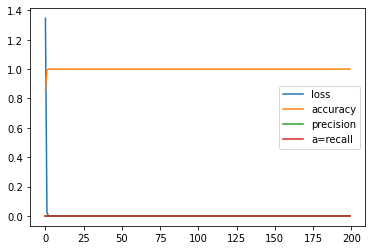

In [12]:
pd.DataFrame(history.history).plot()
